In [62]:
from __future__ import division
import numpy as np

def closest_power_of_2(n):
    return 2 ** int(np.ceil(np.log(n) / np.log(2)))

def autocorrelation_1d(data):
    n = len(data)
    X = np.zeros(2 * closest_power_of_2(n))
    X[:N] = data
    F = np.fft.fft(X)
    result = np.fft.ifft(F * F.conj())[:N].real / (N - np.arange(N))
    return result[:N]

def autocorrelation(X):
    X = np.asarray(X)
    if X.ndim==1:
        return autocorrelation_1d(X)
    
    else:
        result = autocorrelation_1d(X[:,0])
        for j in range(1, data.shape[1]):
            result += autocorrelation_1d(X[:,j])
        return result

In [73]:
import numpy as np
import matplotlib.pyplot as plt

gamma = 2.7
T = 0.1
dt = 0.02
v_factor = np.sqrt(2*T*gamma*dt)
N = 32768

acfs = []
for j in range(300):

    v = 0
    for i in range(500):
        noise_force = v_factor*np.random.normal()
        v = v - gamma*v*dt + noise_force

    v_data = []
    noise_data = []

    for i in range(N):
        noise_force = v_factor*np.random.normal()
        v = v - gamma*v*dt + noise_force
        v_data.append(v)
        noise_data.append(noise_force)
    v_data = np.array(v_data)
    noise_data = np.array(noise_data)/np.sqrt(dt)

# Compute the autocorrelation function and plot the result

    acf = autocorrelation(v_data)[:N//64]
    
    acfs.append(acf)

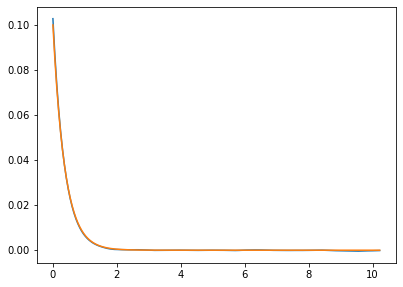

In [74]:
acf = np.mean(acfs,axis=0)

time = np.arange(N//64)*dt

plt.plot(time, acf, label='VACF (num.)')

plt.plot(time, T*np.exp(-gamma*time), label='VACF (theo.)')